<a href="https://colab.research.google.com/github/bkgsur/StatisticsWithPython/blob/main/AlmostSureConvergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Almost Sure Convergence**




In [3]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def convergence(xn, ylabel,t,d):     
  ep = 0.005
  m = np.ceil(np.log(1-t)/np.log(1-ep)).astype(int)    
  n= 1000

  e =[xn(m) for i in range(n)]
  if(d=='U'):
    f = filter(lambda x: x>t, e)  
  elif  (d=='G'):
    f = filter(lambda x: x>t-ep and x<t+ep , e)     
  elif(d=='B'):
    f = filter(lambda x: x>t-ep and x<t+ep , e)     

  p= np.mean(list(f))  
  r=[xn(i) for i in range(1,n)]
  plt.plot(r)
  plt.axhline(y=p, color='r', linestyle='-')  
  plt.xlabel("n")
  plt.ylabel(ylabel)  
  plt.show()
 
  print("calculated probability -",p)
  print("========================================================")



1. Max of Uniform Distribution


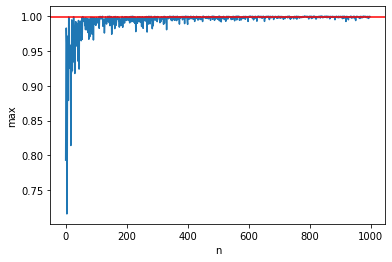

calculated probability - 0.9983419040617195


In [106]:
print("1. Max of Uniform Distribution")
u = scipy.stats.uniform() 
xn = lambda i: u.rvs(i).max()
# calculate m for 99% probability convergence of the random variable to within 0.05 
convergence(xn,"max" ,0.95,'U')

2. Mean of Gaussian Distribution


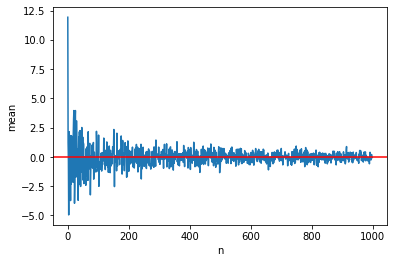

calculated probability - 0.0014535631794689468


In [107]:
print("2. Mean of Gaussian Distribution")
u = scipy.stats.norm(0,10)
xn = lambda i: u.rvs(i).mean()
convergence(xn,"mean",0.0001,'G' )

3. Mean of Bernoulli Distribution


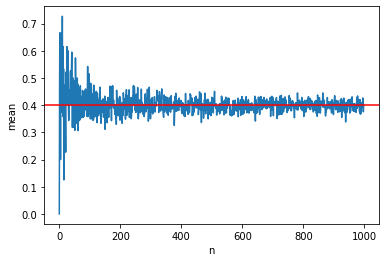

calculated probability - 0.40196078431372534


In [108]:
print("3. Mean of Bernoulli Distribution")
u = scipy.stats.bernoulli(0.4)
xn = lambda i: u.rvs(i).sum()/i
convergence(xn,"mean",0.4,'B' )